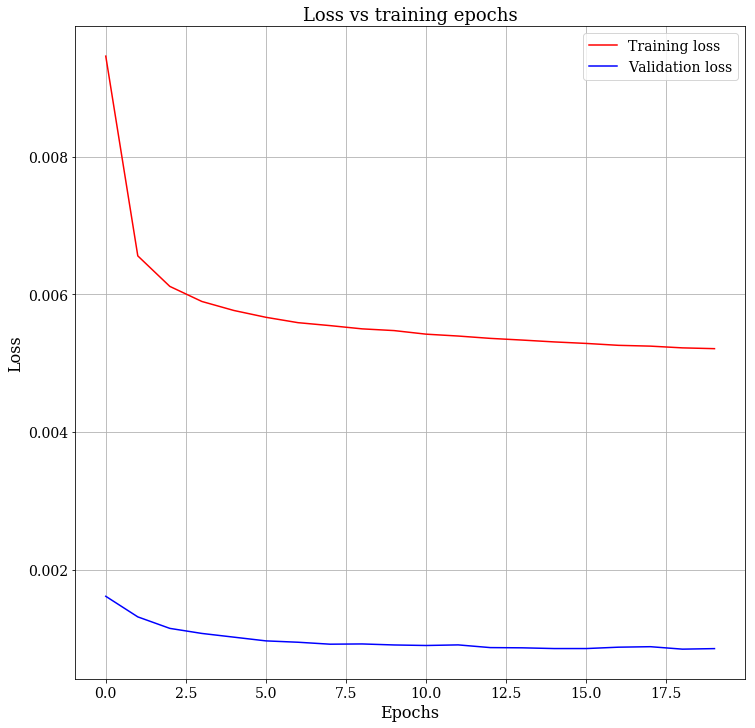

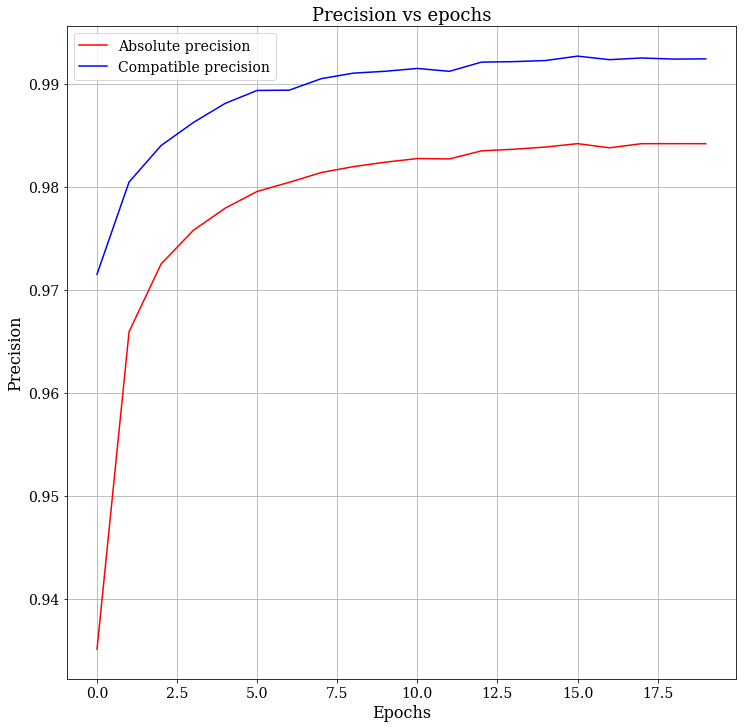

In [4]:
import numpy as np
import json
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

font = {'family': 'serif', 'size': 14}

plt.rc('font', **font)

size_title = 18
size_label = 16
n_pred = 2

train_loss = [0.00945831, 0.00655803, 0.00611492, 0.00589609, 0.00576525, 0.00566633, 0.0055884, 0.00554572, 
              0.00549853, 0.00547341, 0.00542137, 0.00539429, 0.00536037, 0.00533567, 0.00530881, 0.00528686,
              0.00525942, 0.00524772, 0.00522248, 0.00521099]

test_loss = [0.00161575, 0.00131665, 0.00114968, 0.00107626, 0.00102219, 0.00096812, 0.00094851, 0.00092018,
             0.00092368, 0.00090893, 0.00090124, 0.00090993, 0.00087075, 0.00086739, 0.00085678, 
             0.00085688, 0.00087665, 0.00088375, 0.00084815, 0.00085599]

abs_precision = [0.9351081939018602, 0.9659366061405238, 0.972529455057452, 0.975779031390519, 0.9779500322016549, 0.979575727045763, 0.9804608325277204, 0.9814136015659952, 0.9819836134178207, 0.9824178432738635, 0.9827722615888214, 0.982733402658492, 0.9835183182075018, 0.9836718679822946, 0.9838904987108652, 0.984217457731638, 0.9838135456725509, 0.9842173808166492, 0.9842171958767941, 0.9842145356705616]

compatible_precision = [0.9715340310749563, 0.9804832197061457, 0.9840346549778257, 0.9862564795719062, 0.9881293438250105, 0.9893872786700292, 0.9894145097028756, 0.9905302124622434, 0.9910672973690355, 0.9912497986955704, 0.9915235258820404, 0.9912436159086552, 0.9921383487115638, 0.992185478876297, 0.9922930652613167, 0.99272040219168, 0.9923767405624778, 0.9925406035732085, 0.9924330314634524, 0.9924555506444436]

def plot_hist(x_val1, x_val2, title, xlabel, ylabel, leg):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.plot(x_pos, x_val2, 'b')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.legend(leg)
    plt.grid(True)
    plt.show()


plot_hist(train_loss, test_loss, "Loss vs training epochs", "Epochs", "Loss", ['Training loss', 'Validation loss'])
plot_hist(abs_precision, compatible_precision, "Precision vs epochs", "Epochs", "Precision", 
          ['Absolute precision', 'Compatible precision'])


In [25]:
def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

def plot_hist_one(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()


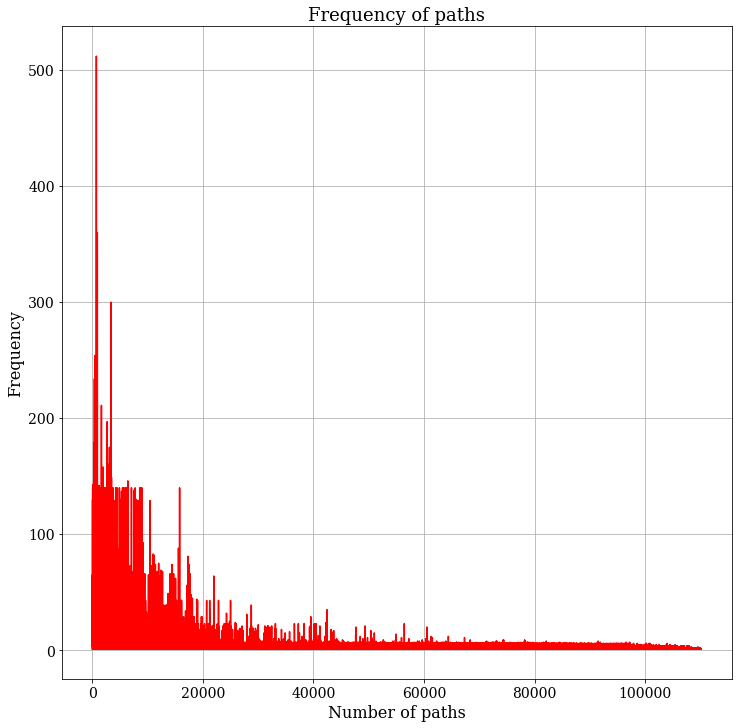

In [26]:
path_freq = read_file("data/for_plots/frequency_paths.txt")

path_freq_values = list()
for item in path_freq:
    freq = path_freq[item]
    path_freq_values.append(freq)
plot_hist_one(path_freq_values, "Frequency of paths", "Number of paths", "Frequency")

AttributeError: 'NoneType' object has no attribute 'update'

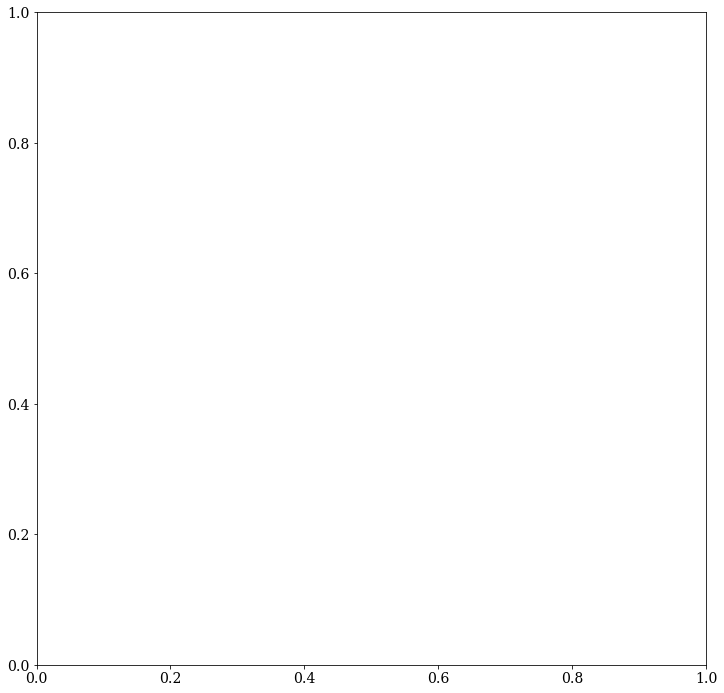

In [32]:


def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

def plot_hist_two(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.hist(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

path_tr_data = read_file("data/for_plots/train_paths_dict.txt")
tr_paths_length = dict()
tr_labels_length = dict()
for item in path_tr_data:
    path = item
    labels = path_tr_data[item]
    
    path_len = len(path.split(","))
    labels_len = len(labels.split(","))
    
    if path_len in tr_paths_length:
        tr_paths_length[path_len] += 1
    else:
        tr_paths_length[path_len] = 1
        
    if labels_len in tr_labels_length:
        tr_labels_length[labels_len] += 1
    else:
        tr_labels_length[labels_len] = 1
        
plot_hist_two(list(tr_paths_length.values()), "Size of paths", "Size (number of tools)", "Number of paths")
plot_hist_two(list(tr_labels_length.values()), "Size of labels", "Size (number of tools)", "Number of paths")
    

In [30]:
tr_labels_length

{2: 58452,
 1: 82872,
 3: 15155,
 4: 6041,
 5: 2051,
 7: 175,
 6: 275,
 8: 86,
 9: 32,
 11: 1,
 10: 5,
 19: 1,
 14: 2,
 13: 1,
 12: 1}